In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import tensorflow as tf
from sklearn.utils import shuffle


plt.style.use('ggplot')
import librosa
from librosa import feature
from librosa import display
genres = [
    'blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop',
    'reggae', 'rock'
]

In [2]:
# load dataframe from csv
dfFeatures = pd.read_csv("music_features.csv")

# shuffle dataframe
dfFeatures = shuffle(dfFeatures)

# extract genres for labels
genreList = dfFeatures['genre']

# drop genres and filenames for training data
dfFeatures= dfFeatures.drop(columns = ['filename', 'genre'])

dfFeatures.head()

,chroma_stft_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,tempo,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,...,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean
826,0.392567,1758.467938,2014.614786,3829.837553,0.071227,135.999178,-180.312759,105.629097,-5.806854,42.814510,...,-6.771460,9.776769,-5.660861,4.241174,-8.112494,1.277053,-7.566436,7.536322,-2.396313,-2.477251
773,0.407098,3590.032649,3187.990559,7592.527484,0.166865,129.199219,-42.253036,54.450443,15.084678,13.538719,...,-4.425991,0.458752,-4.468761,-3.039186,-4.779815,-5.788713,0.308610,-2.324765,1.827395,-0.083827
72,0.323459,2738.990772,2530.464176,5767.351205,0.147458,103.359375,-110.018791,83.345253,0.317202,42.437420,...,-15.472509,5.583749,-26.665312,4.824341,-14.321571,11.899582,-13.121679,2.834088,-13.083383,-5.487480
593,0.260856,2166.352432,2847.748142,5204.864969,0.078757,161.499023,-242.747101,94.892075,22.907286,17.086290,...,-5.184410,-2.202826,-1.290605,-6.593393,-0.551732,2.809423,3.685348,1.426472,3.097189,-2.202985
119,0.294376,1055.978451,1505.197941,1995.718249,0.045748,135.999178,-524.500610,144.450256,-8.966022,40.547935,...,-6.340392,7.090057,1.807705,4.638676,8.205899,10.100617,11.119442,9.385938,4.928630,-6.569338


In [3]:
# standardize data  
scaler = StandardScaler()
X = scaler.fit_transform(np.array(dfFeatures.iloc[:, :-1], dtype = float))

# encode labels 
encoder = LabelEncoder()
y = encoder.fit_transform(genreList)

# split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [4]:
# initialize keras network
model = keras.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [5]:
# configure model for training
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# train model
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 2.2302 - accuracy: 0.1613
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 1.9526 - accuracy: 0.3501
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 1.7546 - accuracy: 0.4066
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 1.5829 - accuracy: 0.4405
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 1.4130 - accuracy: 0.4938
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 1.3117 - accuracy: 0.5625
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 1.2270 - accuracy: 0.5832
Epoch 8/100
7/7 [==============================] - 0s 1ms/step - loss: 1.1253 - accuracy: 0.6307
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 1.0703 - accuracy: 0.6404
Epoch 10/100
7/7 [==============================] - 0s 1ms/step - loss: 1.0106 - accuracy: 0.6929
Epoch 11/100
7/7 [===========

7/7 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 1.0000
Epoch 85/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0259 - accuracy: 1.0000
Epoch 86/100
7/7 [==============================] - 0s 1ms/step - loss: 0.0237 - accuracy: 1.0000
Epoch 87/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 1.0000
Epoch 88/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0217 - accuracy: 1.0000
Epoch 89/100
7/7 [==============================] - 0s 1ms/step - loss: 0.0204 - accuracy: 1.0000
Epoch 90/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 1.0000
Epoch 91/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 92/100
7/7 [==============================] - 0s 1ms/step - loss: 0.0185 - accuracy: 1.0000
Epoch 93/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 1.0000
Epoch 94/100
7/7 [===============

loss
accuracy


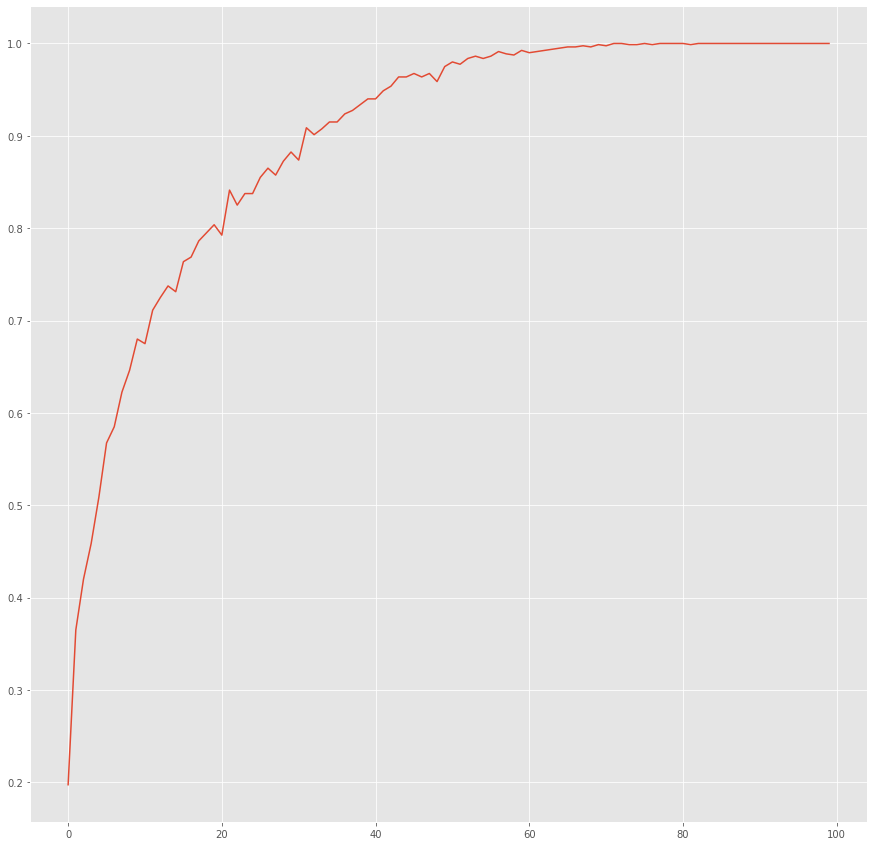

In [7]:
fig, ax = plt.subplots(1,1,figsize=(15,15))

ax.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
for i in history.history:
    print(i)

In [8]:
test_loss, test_acc  = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 2ms/step - loss: 1.8686 - accuracy: 0.6400


In [9]:
# initialize keras network
modeldropout = keras.Sequential()
modeldropout.add(keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
modeldropout.add(keras.layers.Dropout(0.2))
modeldropout.add(keras.layers.Dense(128, activation='relu'))
modeldropout.add(keras.layers.Dropout(0.2))
modeldropout.add(keras.layers.Dense(64, activation='relu'))
modeldropout.add(keras.layers.Dropout(0.2))
modeldropout.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
modeldropout.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = modeldropout.fit(X_train,
                    y_train,
                    epochs=250,
                    batch_size=128)

Epoch 1/250
7/7 [==============================] - 0s 3ms/step - loss: 2.3014 - accuracy: 0.1181
Epoch 2/250
7/7 [==============================] - 0s 3ms/step - loss: 2.0752 - accuracy: 0.2830
Epoch 3/250
7/7 [==============================] - 0s 2ms/step - loss: 1.9249 - accuracy: 0.3272
Epoch 4/250
7/7 [==============================] - 0s 3ms/step - loss: 1.7975 - accuracy: 0.3549
Epoch 5/250
7/7 [==============================] - 0s 2ms/step - loss: 1.6355 - accuracy: 0.4224
Epoch 6/250
7/7 [==============================] - 0s 3ms/step - loss: 1.6119 - accuracy: 0.4161
Epoch 7/250
7/7 [==============================] - 0s 3ms/step - loss: 1.5242 - accuracy: 0.4398
Epoch 8/250
7/7 [==============================] - 0s 2ms/step - loss: 1.4403 - accuracy: 0.4679
Epoch 9/250
7/7 [==============================] - 0s 3ms/step - loss: 1.4266 - accuracy: 0.4781
Epoch 10/250
7/7 [==============================] - 0s 2ms/step - loss: 1.3066 - accuracy: 0.5394
Epoch 11/250
7/7 [===========

7/7 [==============================] - 0s 3ms/step - loss: 0.3762 - accuracy: 0.8547
Epoch 85/250
7/7 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.9025
Epoch 86/250
7/7 [==============================] - 0s 2ms/step - loss: 0.3480 - accuracy: 0.8867
Epoch 87/250
7/7 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8833
Epoch 88/250
7/7 [==============================] - 0s 3ms/step - loss: 0.3602 - accuracy: 0.8712
Epoch 89/250
7/7 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.8708
Epoch 90/250
7/7 [==============================] - 0s 3ms/step - loss: 0.3230 - accuracy: 0.9010
Epoch 91/250
7/7 [==============================] - 0s 3ms/step - loss: 0.3416 - accuracy: 0.8847
Epoch 92/250
7/7 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8967
Epoch 93/250
7/7 [==============================] - 0s 3ms/step - loss: 0.3624 - accuracy: 0.8882
Epoch 94/250
7/7 [===============

7/7 [==============================] - 0s 2ms/step - loss: 0.1321 - accuracy: 0.9628
Epoch 168/250
7/7 [==============================] - 0s 2ms/step - loss: 0.1230 - accuracy: 0.9596
Epoch 169/250
7/7 [==============================] - 0s 3ms/step - loss: 0.1236 - accuracy: 0.9601
Epoch 170/250
7/7 [==============================] - 0s 3ms/step - loss: 0.1571 - accuracy: 0.9478
Epoch 171/250
7/7 [==============================] - 0s 2ms/step - loss: 0.1149 - accuracy: 0.9605
Epoch 172/250
7/7 [==============================] - 0s 3ms/step - loss: 0.1220 - accuracy: 0.9602
Epoch 173/250
7/7 [==============================] - 0s 3ms/step - loss: 0.1467 - accuracy: 0.9507
Epoch 174/250
7/7 [==============================] - 0s 3ms/step - loss: 0.1159 - accuracy: 0.9703
Epoch 175/250
7/7 [==============================] - 0s 2ms/step - loss: 0.1261 - accuracy: 0.9591
Epoch 176/250
7/7 [==============================] - 0s 2ms/step - loss: 0.1499 - accuracy: 0.9485
Epoch 177/250
7/7 [=====

7/7 [==============================] - 0s 3ms/step - loss: 0.0889 - accuracy: 0.9662
Epoch 250/250
7/7 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.9679


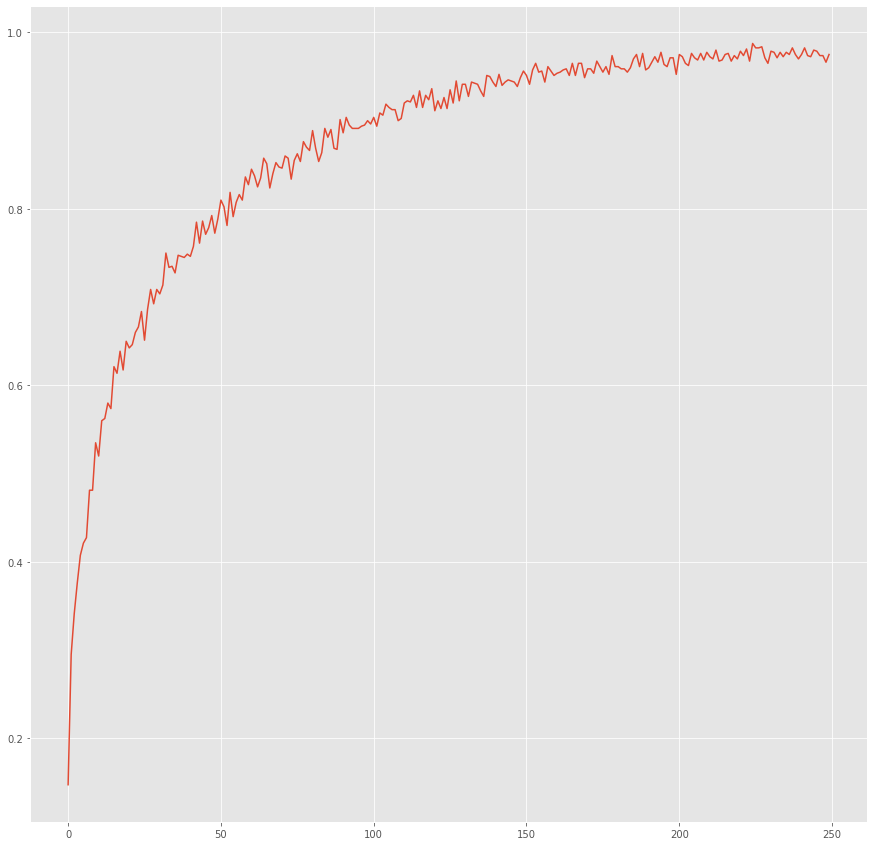

In [12]:
fig, ax = plt.subplots(1,1,figsize=(15,15))

ax.plot(history.history['accuracy'])

In [13]:
test_loss, test_acc  = modeldropout.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 1ms/step - loss: 1.6860 - accuracy: 0.6700
